# **Predictive Analytics: Kualitas Apel**

---


*oleh: [Zahwa Genoveva](https://www.dicoding.com/users/zahwa_genoveva_vwyu/academies)*

*Proyek Submission 1 - Machine Learning
Terapan Dicoding*
<center>
<img src="https://cdn1-production-images-kly.akamaized.net/xBRT773xJ9vvZx12J6fN1IIVhko=/1200x675/smart/filters:quality(75):strip_icc():format(jpeg)/kly-media-production/medias/2792644/original/076377400_1556614591-aaron-blanco-tejedor-390113-unsplash.jpg" align="justify">
</center>

## **1. Mengimpor pustaka/modul python yang dibutuhkan**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Import modules for splitting dataset and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier

# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Pustaka ini memberikan kerangka lengkap untuk mengembangkan model pembelajaran mesin, memproses data, dan mengevaluasi kinerja model.








## **2. Data Understanding**




Data Understanding adalah langkah awal dalam proses analisis data yang bertujuan untuk mengumpulkan, menjelajahi, dan memahami data yang tersedia.

### **2.1 Menyiapkan kredensial akun Kaggle**

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zahwagenoveva","key":"92f019318f3544b303af8dec5939675c"}'}

 Di cell ini, kita meng-upload file yang diperlukan untuk analisis menggunakan fungsi upload() dari modul files

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

disini akan dilakukan pengaturan untuk menggunakan API Kaggle.

### **2.2 Mengunduh dan Menyiapkan Dataset**

![Image of Dataset](https://i.postimg.cc/CKJ0sBXT/Screenshot-2024-10-10-204041.png)

📊 Informasi dataset dapat dilihat pada tabel di bawah ini:


| **Jenis**      | **Keterangan**                                                                                           |
|----------------|----------------------------------------------------------------------------------------------------------|
| **Title**      | Apple Quality                                                                                           |
| **Source**     | Kaggle    
| Sumber                      | [Kaggle Dataset : Apple Quality Dataset](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data) |                                                                                            |
| **Maintainer** | Nidula Elgiriyewithana ⚡                                                                                |
| **License**    | Other (specified in description)                                                                         |
| **Visibility** | Publik                                                                                                |
| **Tags**       | Computer Science, Education, Food, Data Visualization, Classification, Exploratory Data Analysis       |
| **Usability**  | 10.00                                                                                                   |



In [ ]:
!kaggle datasets download -d nelgiriyewithana/apple-quality

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
License(s): other
  0% 0.00/170k [00:00<?, ?B/s]
100% 170k/170k [00:00<00:00, 82.0MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('/content/apple-quality.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
df = pd.read_csv('/content/apple_quality.csv')

### **2.2 Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) adalah langkah awal dalam analisis data yang bertujuan untuk memahami dan menggali informasi dari dataset sebelum melakukan analisis lebih lanjut atau modeling. Tujuan utama EDA adalah membantu melihat data sebelum membuat asumsi apa pun. EDA dapat membantu mengidentifikasi kesalahan yang jelas, serta memahami pola dalam data dengan lebih baik, mendeteksi outlier atau kejadian yang tidak wajar, dan menemukan hubungan yang menarik di antara variabel.

**2.2.1 EDA - Deskripsi Variabel**

Deskripsi Variabel dalam konteks Exploratory Data Analysis (EDA) adalah langkah di mana kita menganalisis dan menjelaskan karakteristik dari setiap variabel dalam dataset.

In [ ]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good




*   Kolom: A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, Acidity, Quality
*   Jumlah Baris: 4002


*   Nilai NaN: Ditemukan di baris ke-4000, menunjukkan data hilang.


In [ ]:
# Menampilkan beberapa baris pertama dari dataset
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


Output menunjukkan lima baris pertama dari DataFrame yang berisi informasi mengenai kualitas apel

In [ ]:
# Menampilkan informasi dasar tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


Hasil dari eksekusi metode df.info() menunjukkan:

Ada 6 kolom numerik yang memiliki tipe data float64, yaitu: Size, Weight, Sweetness, Crunchiness, Juiciness, dan Ripeness. Sementara itu, terdapat 2 kolom dengan tipe data object, yaitu: Acidity dan Quality. Namun, pada data asli, kolom Acidity seharusnya bertipe float64, dan kita akan melakukan perubahan pada kolom tersebut.

In [ ]:
# Menampilkan statistik deskriptif dari dataset
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [ ]:
df.shape

(4001, 9)

Hasil dari df.shape adalah (4001, 9), yang berarti:

4001: Jumlah baris dalam DataFrame.
9: Jumlah kolom dalam DataFrame.

Jadi, DataFrame df memiliki 4001 baris data dan 9 kolom variabel.

### **2.2.2 EDA - Menangani Missing Value dan Outliers**

Exploratory Data Analysis (EDA) dalam menangani missing values melibatkan teknik seperti menghapus data yang hilang (drop), mengganti dengan nilai rata-rata (mean), median, modus, atau menggunakan metode imputasi lebih kompleks seperti KNN atau regresi. Sedangkan untuk outliers, penanganannya meliputi identifikasi menggunakan metode statistik (IQR, z-score), kemudian memilih untuk menghapus, merubah, atau membiarkan outliers tergantung pada pengaruhnya terhadap model dan data.

In [ ]:
# Menghapus kolom "A_id" dari DataFrame df
df.drop("A_id",axis=1,inplace=True)

Dikarenakan kolom A_id tidak mempengaruhi model maka akan di drop / dihapus.

In [ ]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [ ]:
# Cek nilai yang hilang
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


Menghitung jumlah nilai yang hilang di setiap kolom untuk mengetahui apakah ada missing values yang perlu ditangani.

In [ ]:
# Menghapus baris yang memiliki nilai hilang dari DataFrame df
df_cleaned = df.dropna()

baris-baris yang memiliki nilai hilang dihapus dari DataFrame df menggunakan metode dropna(). Hasilnya disimpan dalam DataFrame baru yang disebut df_cleaned, sehingga DataFrame ini hanya berisi data lengkap.

In [ ]:
# Menampilkan jumlah nilai yang hilang setelah menghapus baris dengan nilai hilang
print("\nJumlah Nilai yang Hilang Setelah Menangani:\n", df_cleaned.isnull().sum())


Jumlah Nilai yang Hilang Setelah Menangani:
 Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


Menampilkan Jumlah Nilai yang Hilang Setelah Penanganan

In [ ]:
# Memeriksa jumlah duplikasi dalam DataFrame yang telah dibersihkan
print(f"Jumlah duplikasi dalam data: {df_cleaned.duplicated().sum()}")

Jumlah duplikasi dalam data: 0


Menghitung berapa banyak baris duplikat yang ada dalam DataFrame setelah proses pembersihan.

In [ ]:
# Menghitung dan menampilkan proporsi masing-masing kategori dalam kolom 'Quality' dari DataFrame df
df.Quality.value_counts(normalize=True)

,proportion
Quality,
good,0.501
bad,0.499


In [ ]:
# Menampilkan nilai unik dalam kolom 'Acidity'
print("Nilai Unik dalam Kolom 'Acidity':")
print(df['Acidity'].unique())

Nilai Unik dalam Kolom 'Acidity':
['-0.491590483' '-0.722809367' '2.621636473' ... '-2.229719806'
 '1.599796456' 'Created_by_Nidula_Elgiriyewithana']


Menghitung Proporsi Kategori dalam Kolom 'Quality'

In [ ]:
# Mengganti nilai non-numeric dengan NaN
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')

Menampilkan Nilai Unik dalam Kolom 'Acidity'

In [ ]:
# Menghapus baris yang memiliki NaN di kolom 'Acidity'
df = df.dropna(subset=['Acidity'])

Mengganti Nilai Non-Numeric dengan NaN
python

In [ ]:
# Mengonversi kolom 'Acidity' ke float64
df.loc[:, 'Acidity'] = df['Acidity'].astype('float64')

Mengonversi tipe data di kolom 'Acidity' menjadi float64 agar dapat digunakan dalam analisis numerik.

In [ ]:
# Menampilkan informasi tentang DataFrame setelah penanganan
print("Informasi Setelah Penanganan Kolom 'Acidity':")
df.info()

Informasi Setelah Penanganan Kolom 'Acidity':
<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


Dapat kita lihat:

Jumlah data Float64 ada 7 dan object ada 1.

 Membuat Boxplot untuk Identifikasi Outliers

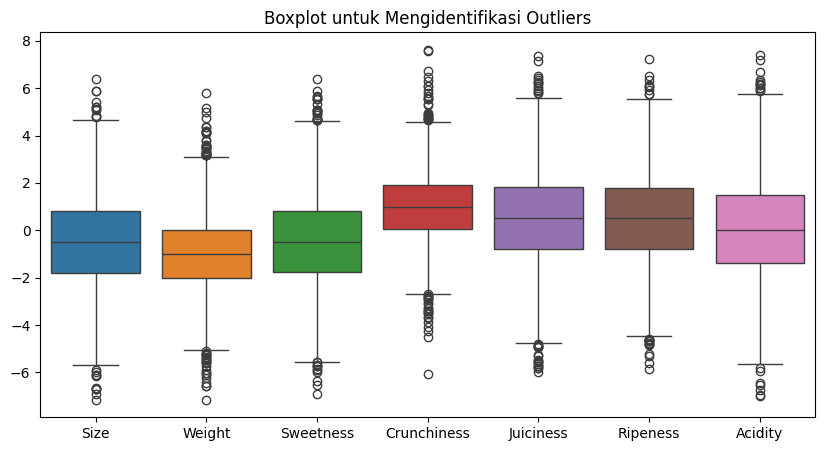

In [ ]:
import warnings

# Mengabaikan FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Plotting boxplot untuk mengidentifikasi outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title("Boxplot untuk Mengidentifikasi Outliers")
plt.show()


**Visualisasi Outlier**

*Menghapus outliers yang ada pada dataset*  


Pada kasus ini, kita akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, menangani outliers dengan teknik IQR method.


```
IQR = Inter Quartile Range
IQR = Q3 - Q1
```



Mengidentifikasi outliers menggunakan IQR hanya untuk kolom numerik

In [ ]:
df_cleaned = df.dropna()
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns  # Memilih kolom numerik

Q1 = df_cleaned[numeric_cols].quantile(0.25)
Q3 = df_cleaned[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

Menentukan batas untuk outliers

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Mengidentifikasi outliers

In [ ]:
outliers = ((df_cleaned[numeric_cols] < lower_bound) | (df_cleaned[numeric_cols] > upper_bound)).any(axis=1)

Menampilkan jumlah outliers

In [ ]:
print(f"\nJumlah Outliers: {outliers.sum()}")


Jumlah Outliers: 210


Menghapus outliers dari dataset

In [ ]:
df_final = df_cleaned[~outliers]

In [ ]:
df_final.shape

(3790, 8)

Dari output yang dihasilkan, (3790, 8) berarti DataFrame df_final memiliki 3790 baris dan 8 kolom.

Visualisasi distribusi data setelah menghapus outliers

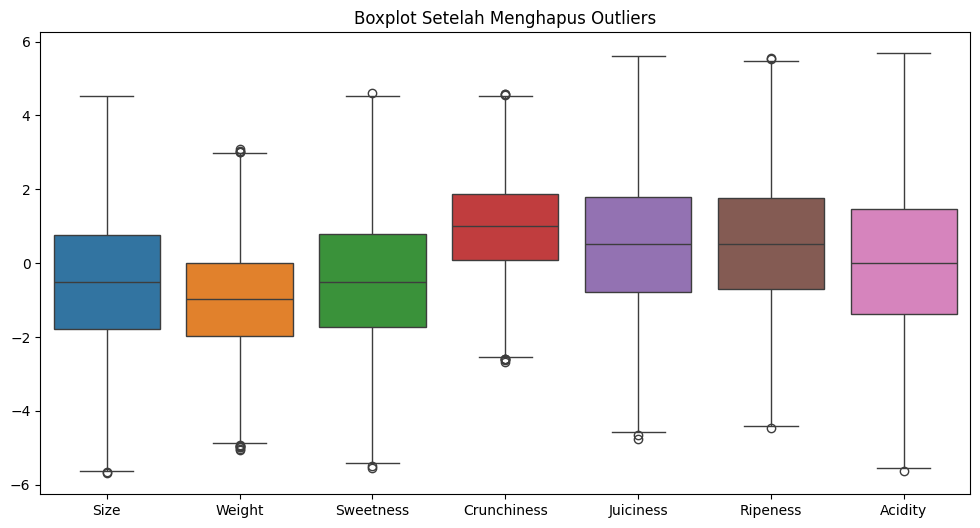

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_final[numeric_cols])
plt.title("Boxplot Setelah Menghapus Outliers")
plt.show()

**Visualisasi Outlier**

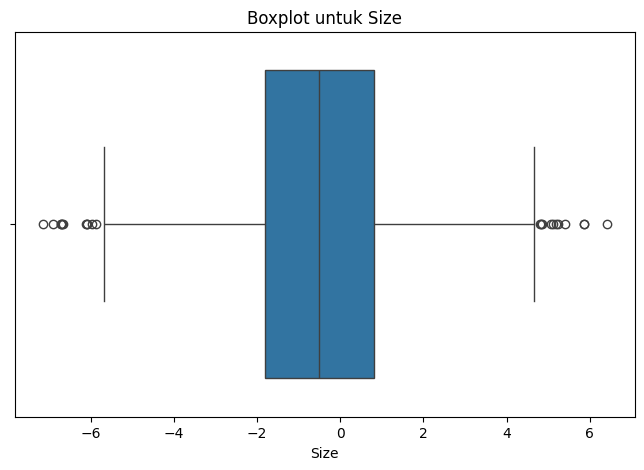

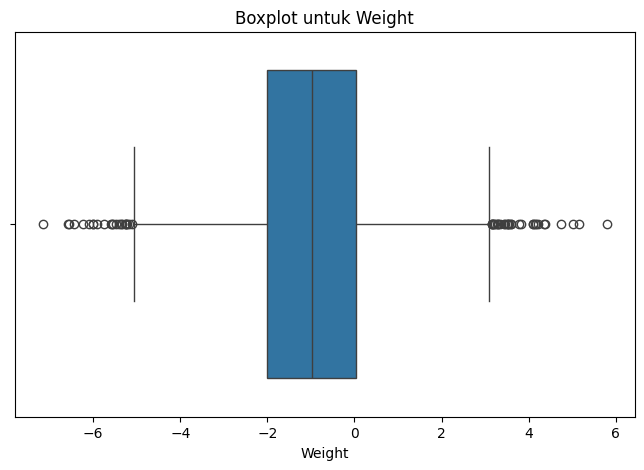

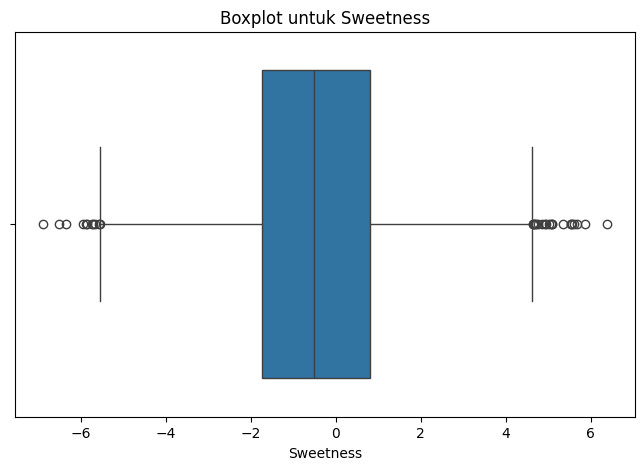

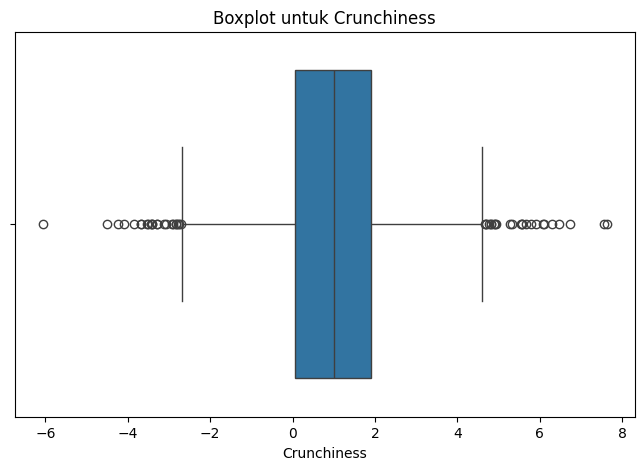

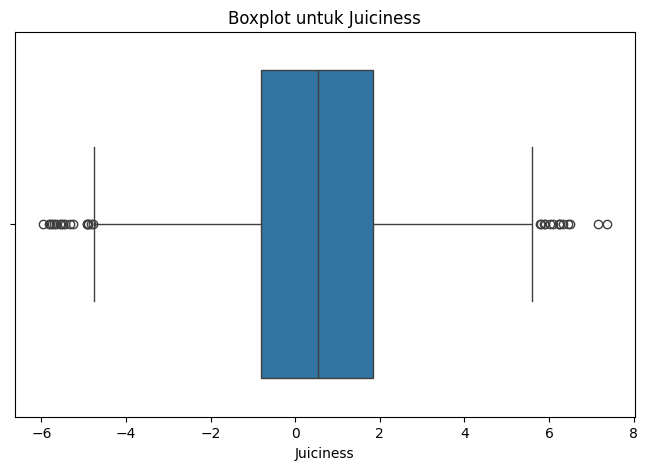

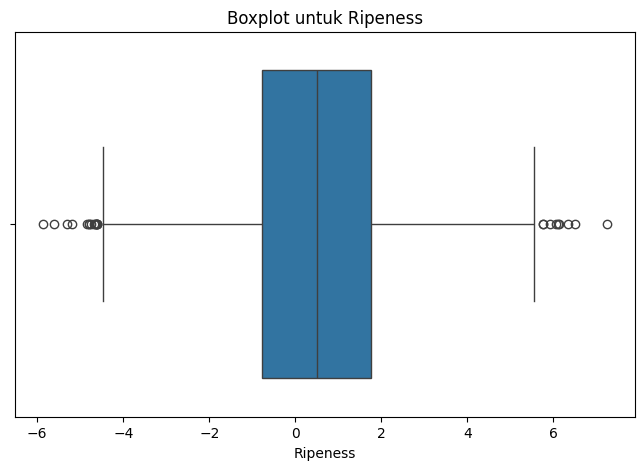

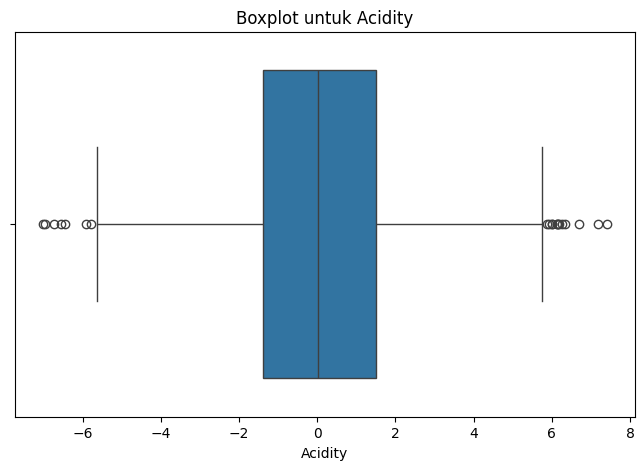

In [ ]:
# Menggunakan dataset yang sudah ada (df)
df_outlier = df.select_dtypes(exclude=['object'])

# Looping untuk membuat boxplot untuk setiap kolom
for column in df_outlier:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_outlier, x=column)

    # Menambahkan judul
    plt.title(f'Boxplot untuk {column}')

    # Menampilkan plot
    plt.show()

In [ ]:
df_final.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,-0.511357,-0.987773,-0.479110,0.985224,0.499397,0.529009,0.057943
std,1.850336,1.497196,1.871642,1.298640,1.851270,1.803875,2.047036
min,-5.692093,-5.058679,-5.548641,-2.683859,-4.756731,-4.471210,-5.634195
25%,-1.796718,-1.969178,-1.724304,0.094551,-0.794319,-0.707739,-1.373031
50%,-0.514732,-0.979754,-0.505682,0.996911,0.509553,0.528713,0.014117
75%,0.769200,0.009484,0.777221,1.874618,1.786527,1.769622,1.461692
max,4.524772,3.081538,4.606386,4.591936,5.598023,5.548138,5.685253


**2.2.3 EDA - Univariate Analysis**

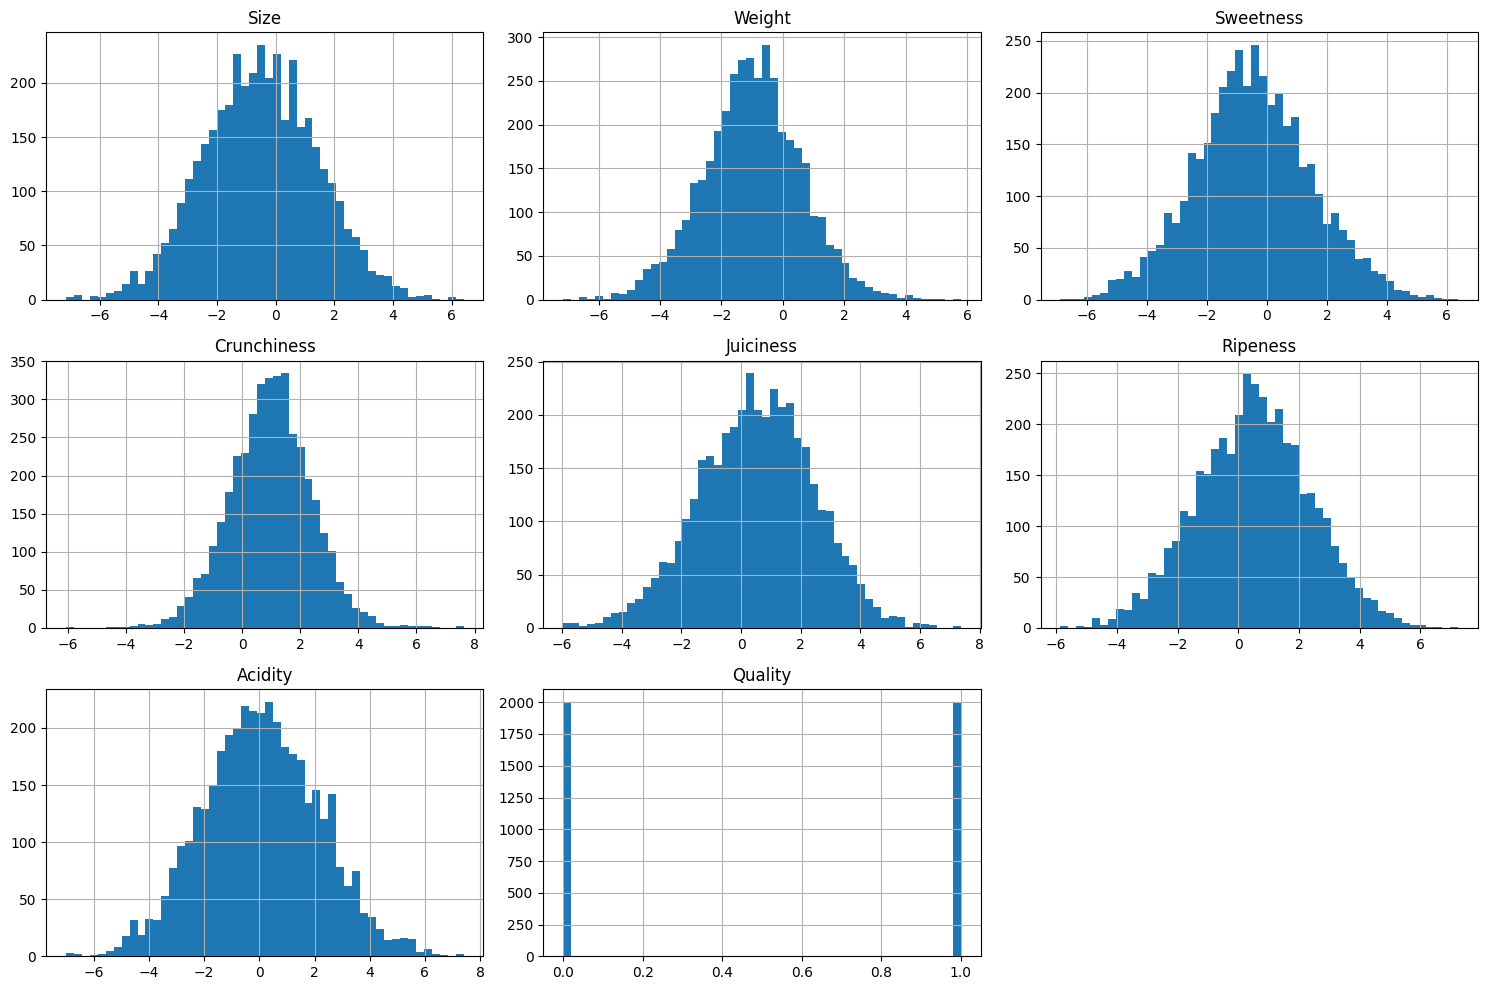

In [ ]:
def univariate_analysis_hist(df):
    # Visualisasi histogram untuk semua kolom numerik
    df.select_dtypes(include=['float64', 'int64']).hist(bins=50, figsize=(15, 10))
    plt.tight_layout()  # Menambahkan layout agar tidak bertumpuk
    plt.show()

# Panggil fungsi untuk melakukan univariate analysis
univariate_analysis_hist(df_cleaned)

Secara keseluruhan, visualisasi ini menunjukkan bahwa objek-objek yang dianalisis memiliki karakteristik yang cukup seragam, kecuali untuk atribut kualitas yang cenderung sangat terpusat pada satu nilai. Ini bisa mengindikasikan bahwa proses produksi atau seleksi objek ini cukup konsisten dalam menghasilkan produk dengan kualitas yang hampir sama.

### **2.2.4 EDA - Multivariate Analysis**

### **Encoding Fitur Kategori (Categorical Encoding)**

In [ ]:
# Mengonversi kolom kategori ke numerik
def convert_categorical_to_numerical(df):
    # Menggunakan label encoding untuk kolom kategori
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()

    for col in df.select_dtypes(include='object').columns:
        df[col] = le.fit_transform(df[col])

    return df


### **Menampilkan pairplot**

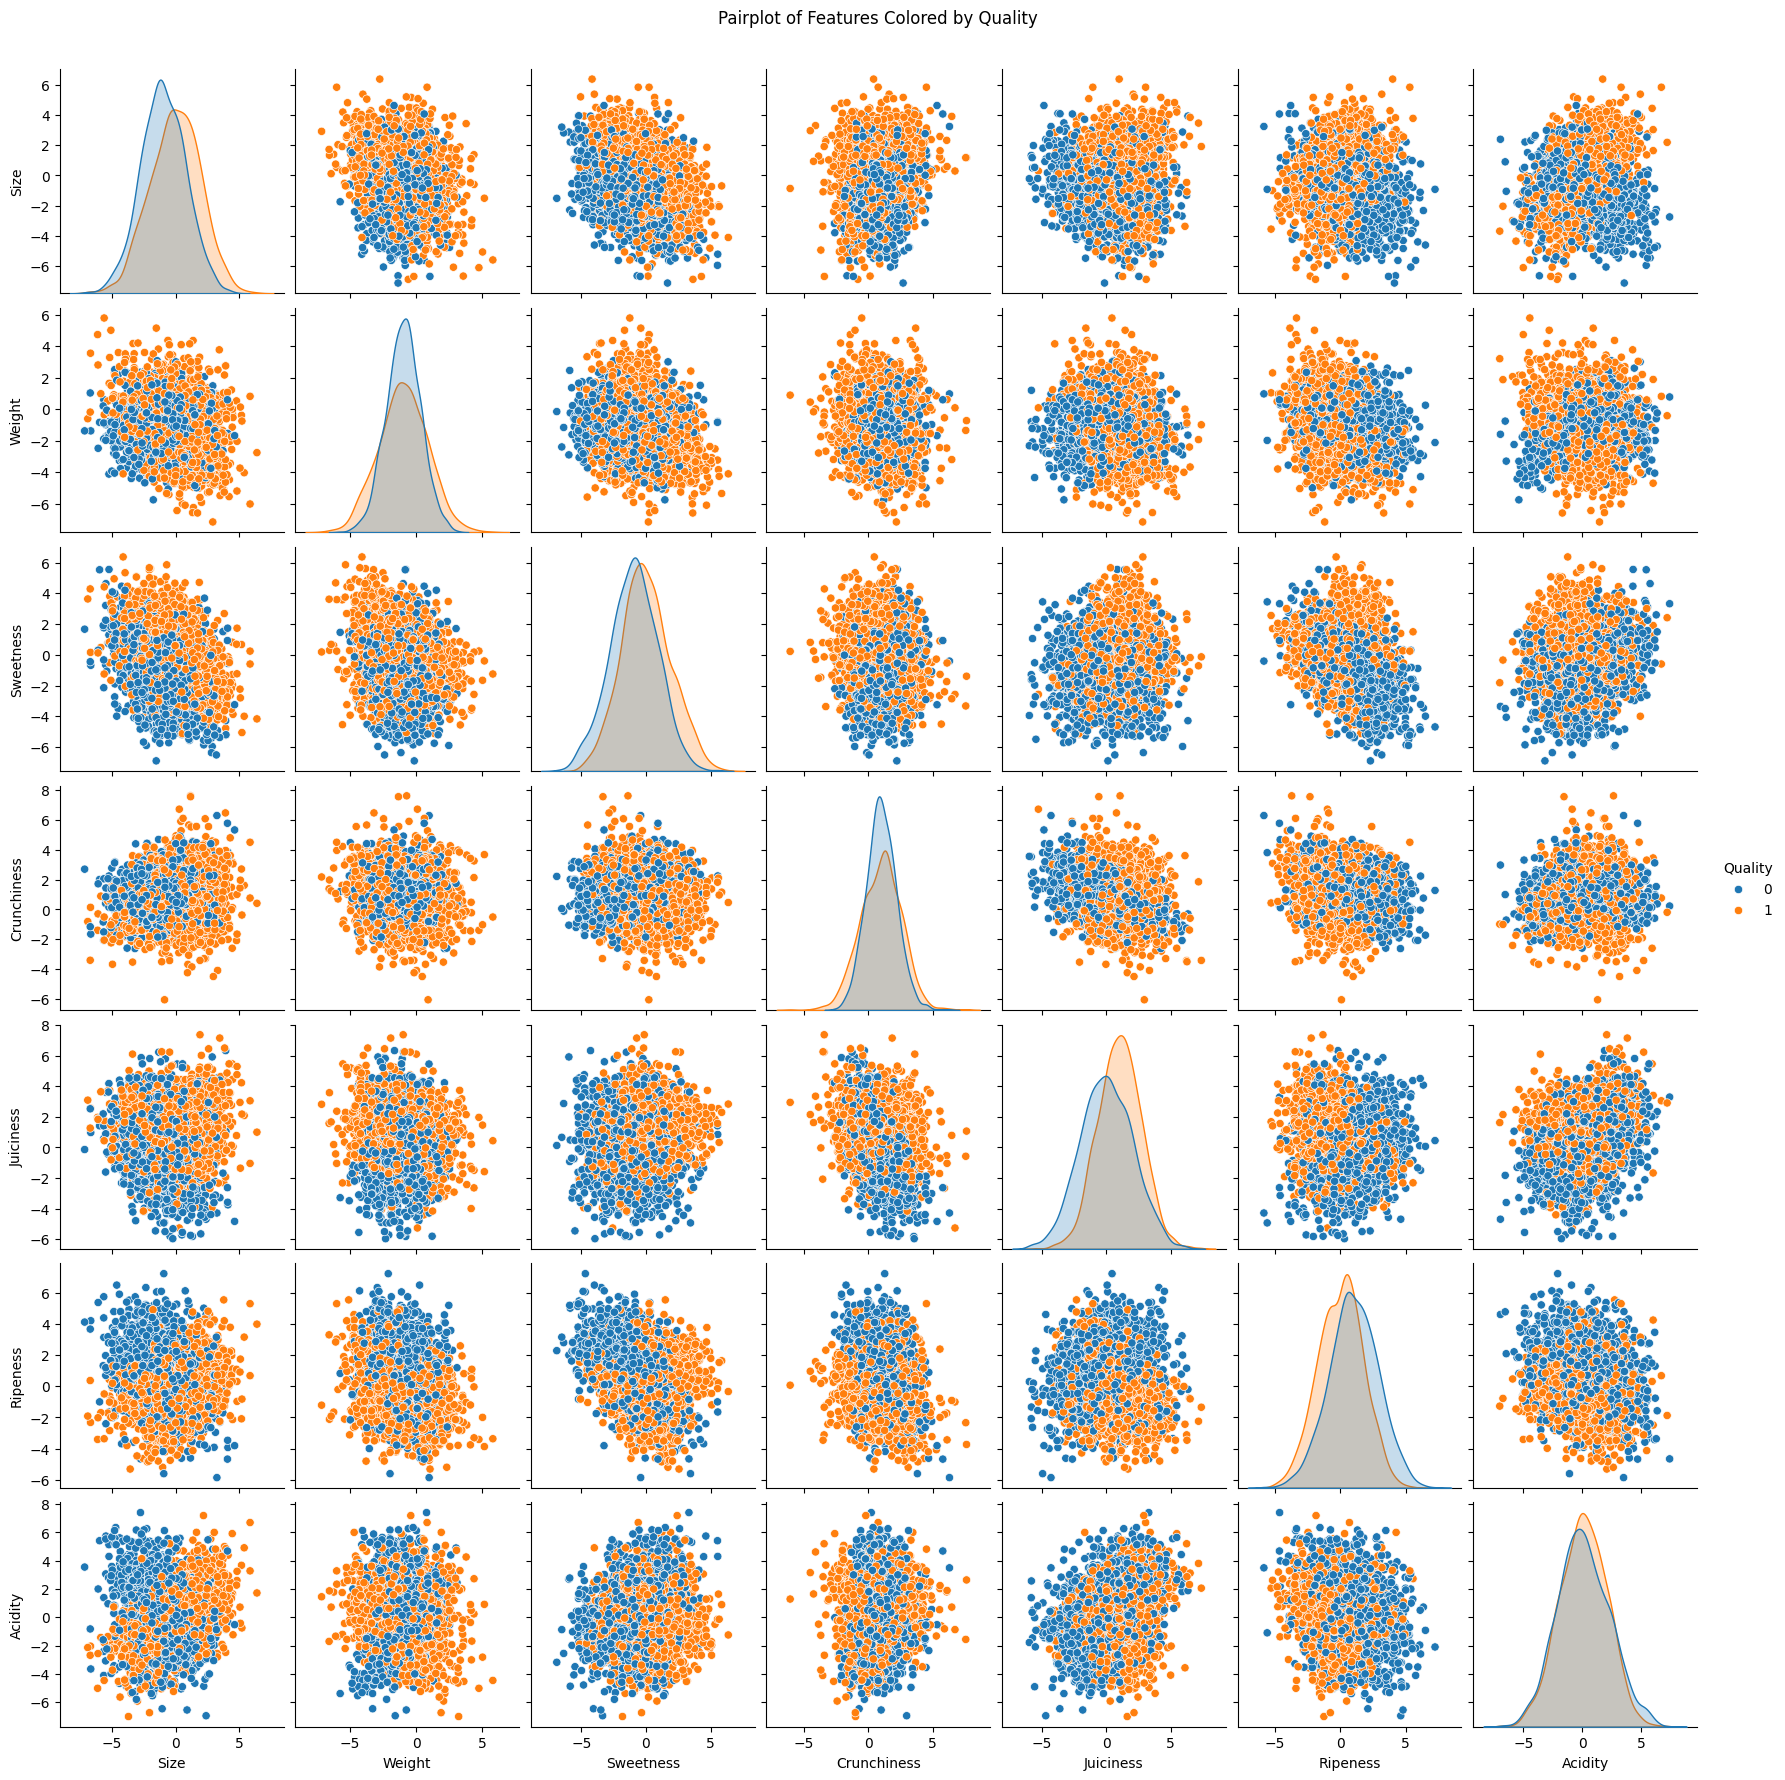

In [ ]:
def plot_pairplot(df):
    # Mengonversi kolom kategori menjadi numerik
    df_numeric = convert_categorical_to_numerical(df)

    # Pairplot untuk analisis lebih dalam
    sns.pairplot(df_numeric, hue='Quality', diag_kind='kde')
    plt.suptitle('Pairplot of Features Colored by Quality', y=1.02)
    plt.show()

# Panggil fungsi untuk menampilkan pairplot
plot_pairplot(df_cleaned)


Secara keseluruhan, pairplot ini membantu kita memahami kompleksitas hubungan antara berbagai karakteristik (seperti ukuran, berat, kemanisan, dsb.) dari suatu objek. Kita bisa melihat variabel mana yang saling terkait, variabel mana yang tidak, dan variabel mana yang mungkin mempengaruhi kualitas.

### **Melakukan pengecekan korelasi**

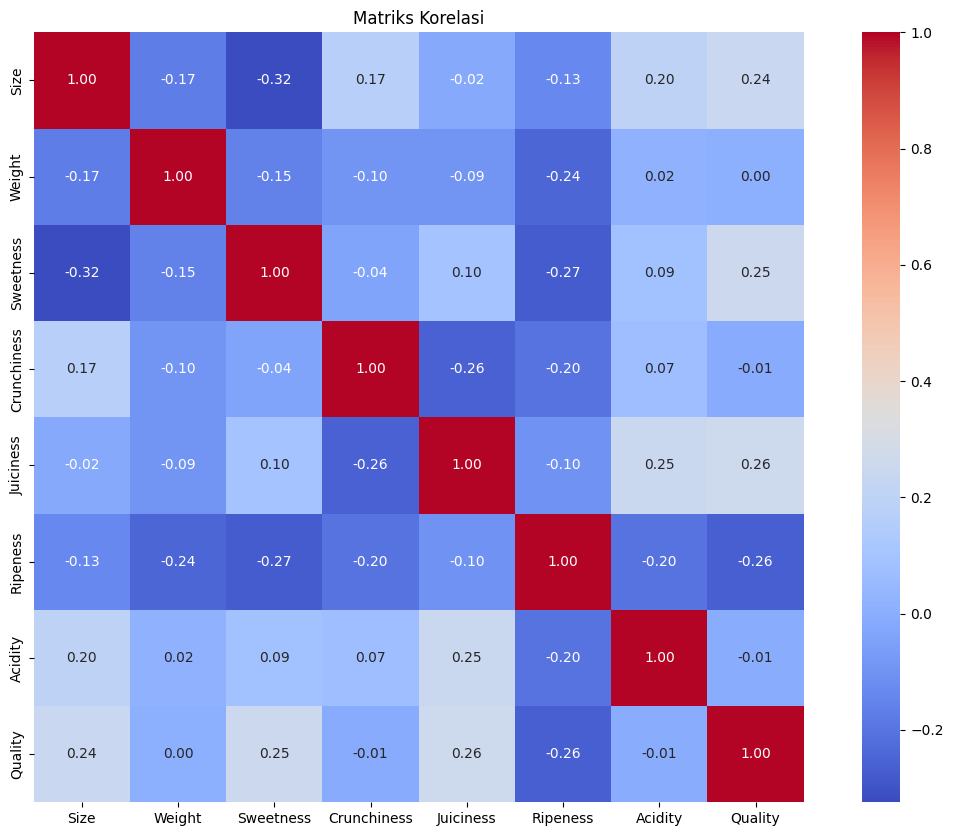

In [ ]:
# Fungsi untuk menampilkan matriks korelasi
def plot_correlation_matrix(df):
    # Mengonversi kolom kategori menjadi numerik
    df_numeric = convert_categorical_to_numerical(df)

    plt.figure(figsize=(15, 10))

    # Korelasi antar fitur
    correlation_matrix = df_numeric.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title('Matriks Korelasi')
    plt.show()

# Panggil fungsi untuk menampilkan matriks korelasi
plot_correlation_matrix(df_cleaned)


Berdasarkan matriks korelasi ini, kita bisa menyimpulkan bahwa kualitas suatu objek dipengaruhi oleh beberapa faktor seperti ukuran, juiciness, acidity, sweetness, dan ripeness. Objek yang lebih besar, lebih juicy, lebih asam, dan kurang manis serta kurang matang cenderung memiliki kualitas yang lebih baik.

# **3. Data Preparation**

Data Preparation adalah proses menyiapkan data mentah sehingga layak untuk diproses dan dianalisis lebih lanjut. Langkah-langkah utama mencakup pengumpulan, pembersihan, dan pelabelan data mentah ke dalam bentuk yang cocok untuk algoritma machine learning (ML), kemudian menjelajahi dan memvisualisasikan data. Data Preparation dapat memerlukan waktu hingga 80% dari waktu yang digunakan untuk proyek ML. Penggunaan alat persiapan data khusus penting untuk mengoptimalkan proses ini.

### **3.1 Train-Test-Split**

Kita akan membagi dataset menjadi data latih (train) dan data uji (test). Tujuan langkah ini sebelum proses lainnya adalah agar kita tidak mengotori data uji dengan informasi yang kita dapat dari data latih.

#### Menyiapkan Data untuk Model

In [ ]:
X = df.drop('Quality', axis=1)
y = df['Quality']

####Mengonversi Kelas Target ke Format Numerik

In [ ]:
# Konversi kelas target ke format numerik
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Mengubah 'bad' dan 'good' menjadi 0 dan 1

mengubah nilai kategori dalam kolom target y ('bad' dan 'good') menjadi format numerik (0 dan 1).

####Membagi Data Menjadi Training dan Testing

In [ ]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

20% dari data akan digunakan untuk pengujian, sementara 80% sisanya akan digunakan untuk pelatihan.

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4000
Total # of sample in train dataset: 3200
Total # of sample in test dataset: 800


####Normalisasi Fitur dengan StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

####Melakukan Skala Data menggunakan StandardScaler (Duplicated)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Normalisasi data pelatihan
X_test_scaled = scaler.transform(X_test)        # Normalisasi data pengujian

####Membuat DataFrame Hasil Normalisasi

In [ ]:
# Membuat DataFrame dari X_train untuk mendapatkan nilai asli
original_values = pd.DataFrame(X_train, columns=X.columns)

# Membuat DataFrame untuk menampilkan hasil normalisasi
normalized_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Menampilkan beberapa baris pertama dari DataFrame hasil normalisasi
print("Hasil Normalisasi:")
print(normalized_df.head())

# Menampilkan nilai asli untuk perbandingan
comparison_df = pd.concat([original_values.reset_index(drop=True), normalized_df.reset_index(drop=True)], axis=1)
comparison_df.columns = [f"Original {col}" for col in X.columns] + [f"Normalized {col}" for col in X.columns]

print("\nPerbandingan Nilai Asli dan Nilai Normalisasi:")
print(comparison_df.head())

Hasil Normalisasi:
       Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity
0  1.027890 -1.001988   0.084334     0.393453   0.271185  1.108047 -0.627140
1  0.173070  0.852012  -0.323051    -0.354721  -0.106767  0.265260 -1.075288
2 -1.041694 -1.165875  -0.192792    -1.034102  -0.324381  2.470441 -0.901013
3 -0.456591  0.285175   1.948610    -0.588818   1.024831 -0.509328 -0.057273
4 -0.816011 -0.146890  -0.177478     2.012460   0.249208  0.139939 -0.030334

Perbandingan Nilai Asli dan Nilai Normalisasi:
   Original Size  Original Weight  Original Sweetness  Original Crunchiness  \
0       1.027890        -1.001988            0.084334              0.393453   
1       0.173070         0.852012           -0.323051             -0.354721   
2      -1.041694        -1.165875           -0.192792             -1.034102   
3      -0.456591         0.285175            1.948610             -0.588818   
4      -0.816011        -0.146890           -0.177478              2.012460 

####Inisialisasi MinMaxScaler dan Normalisasi Data

In [ ]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fit dan transform pada data pelatihan
X_train_scaled = scaler.fit_transform(X_train)

# Transformasi data uji
X_test_scaled = scaler.transform(X_test)

print("Data setelah normalisasi:")
print(X_train_scaled[:5])  # Menampilkan 5 data pertama


Data setelah normalisasi:
[[0.63683187 0.35305009 0.49645027 0.55451442 0.52664718 0.64304288
  0.40105263]
 [0.51523605 0.58231483 0.43646357 0.47743345 0.47180237 0.52263894
  0.33565786]
 [0.34243895 0.33278396 0.45564396 0.40744007 0.44022423 0.83767975
  0.36108855]
 [0.42566827 0.51222009 0.77096161 0.45331553 0.63600913 0.4119784
  0.48420897]
 [0.37454175 0.45879104 0.45789899 0.72131318 0.52345814 0.50473515
  0.48814003]]


## **4. Model Development**

In [ ]:
# Initialize models
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
svm = SVC()  # You can customize parameters if needed
nb = GaussianNB()
dt = DecisionTreeClassifier()
xgb_model = xgb.XGBClassifier()  # Make sure to import and install XGBoost

# Fit models to your training data
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
nb.fit(X_train, y_train)
dt.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Define the evaluate_models function
def evaluate_models(X_test, y_test, models):
    results = []
    for name, model in models.items():
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')

        results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

    return pd.DataFrame(results)

# Create a dictionary of the models
models = {
    'KNN': knn,
    'Random Forest': rf,
    'SVM': svm,
    'Naive Bayes': nb,
    'Decision Tree': dt,
    'XGBoost': xgb_model
}

# Evaluate the models
results_df = evaluate_models(X_test, y_test, models)
print(results_df)


           Model  Accuracy  Precision    Recall
0            KNN   0.89750   0.897644  0.897524
1  Random Forest   0.90875   0.908766  0.908759
2            SVM   0.90750   0.907532  0.907512
3    Naive Bayes   0.76250   0.762737  0.762461
4  Decision Tree   0.80125   0.801293  0.801264
5        XGBoost   0.90625   0.906250  0.906253


## **5. Evaluasi Model**

###Confussion Matrix

**Visualisasi Algoritma KNN**


===== Evaluasi Model: KNN =====
Akurasi: 0.9025

Laporan Klasifikasi:
              precision    recall  f1-score   support

         bad       0.91      0.90      0.90       401
        good       0.90      0.91      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



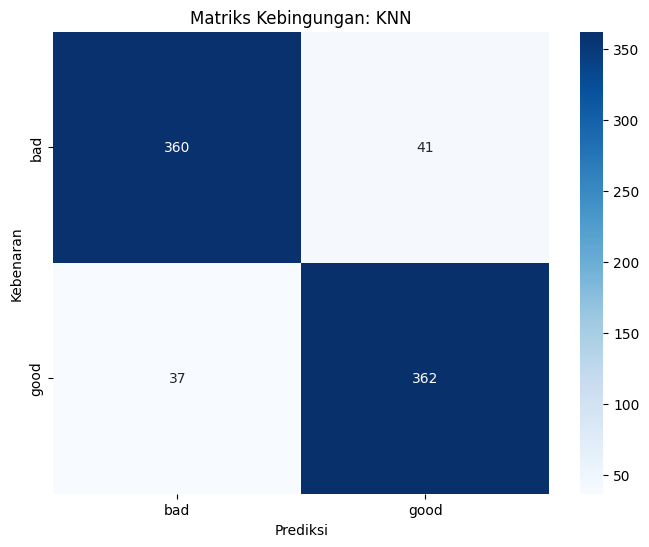

In [ ]:
# Melatih model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluasi model KNN
def evaluate_knn(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print("\n===== Evaluasi Model: KNN =====")
    print(f"Akurasi: {accuracy:.4f}\n")
    print("Laporan Klasifikasi:")
    print(class_report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title('Matriks Kebingungan: KNN')
    plt.xlabel('Prediksi')
    plt.ylabel('Kebenaran')
    plt.show()

    return accuracy  # Mengembalikan akurasi

# Panggil fungsi evaluasi KNN
knn_accuracy = evaluate_knn(y_test, y_pred_knn)

**Visualisasi Algoritma Random Forest**


===== Evaluasi Model: Random Forest =====
Akurasi: 0.8962

Laporan Klasifikasi:
              precision    recall  f1-score   support

         bad       0.90      0.89      0.90       401
        good       0.89      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



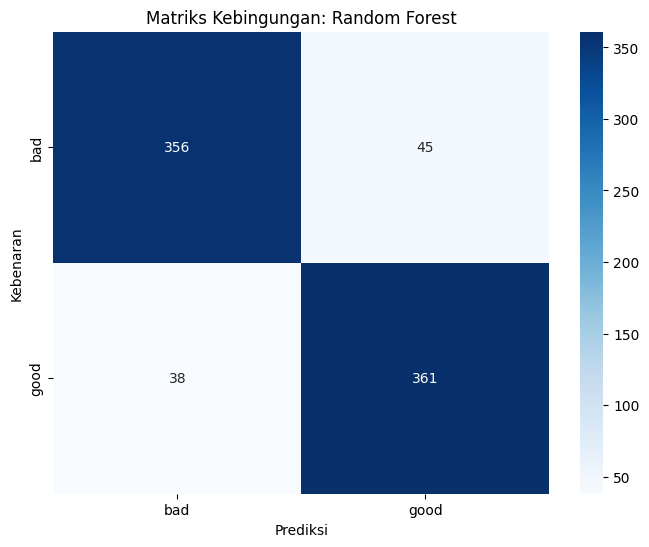

In [ ]:
# Melatih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model Random Forest
def evaluate_rf(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print("\n===== Evaluasi Model: Random Forest =====")
    print(f"Akurasi: {accuracy:.4f}\n")
    print("Laporan Klasifikasi:")
    print(class_report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title('Matriks Kebingungan: Random Forest')
    plt.xlabel('Prediksi')
    plt.ylabel('Kebenaran')
    plt.show()

    return accuracy  # Mengembalikan akurasi

# Panggil fungsi evaluasi Random Forest
rf_accuracy = evaluate_rf(y_test, y_pred_rf)

**Visualisasi Algoritma XGBoost**


===== Evaluasi Model: XGBoost =====
Akurasi: 0.9062

Laporan Klasifikasi:
              precision    recall  f1-score   support

         bad       0.91      0.91      0.91       401
        good       0.91      0.91      0.91       399

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



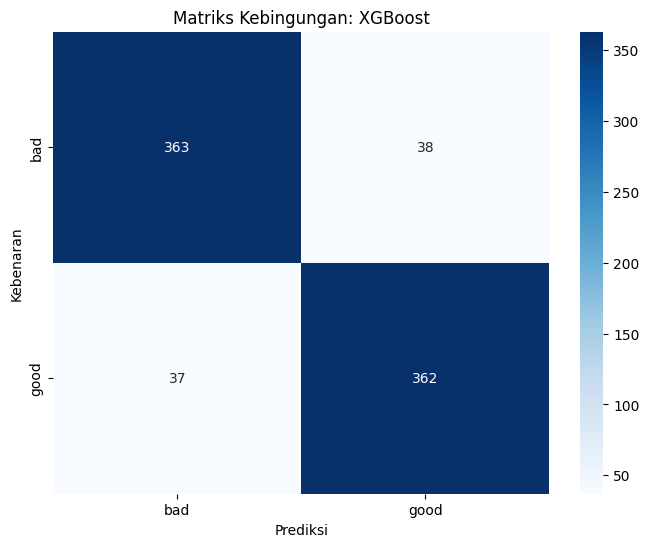

In [ ]:
# Melatih model XGBoost
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi model XGBoost
def evaluate_xgb(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print("\n===== Evaluasi Model: XGBoost =====")
    print(f"Akurasi: {accuracy:.4f}\n")
    print("Laporan Klasifikasi:")
    print(class_report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title('Matriks Kebingungan: XGBoost')
    plt.xlabel('Prediksi')
    plt.ylabel('Kebenaran')
    plt.show()

    return accuracy  # Mengembalikan akurasi

# Panggil fungsi evaluasi XGBoost
xgb_accuracy = evaluate_xgb(y_test, y_pred_xgb)

**Visualisasi Algoritma SVC**


===== Evaluasi Model: SVM =====
Akurasi: 0.9038

Laporan Klasifikasi:
              precision    recall  f1-score   support

         bad       0.90      0.91      0.90       401
        good       0.90      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



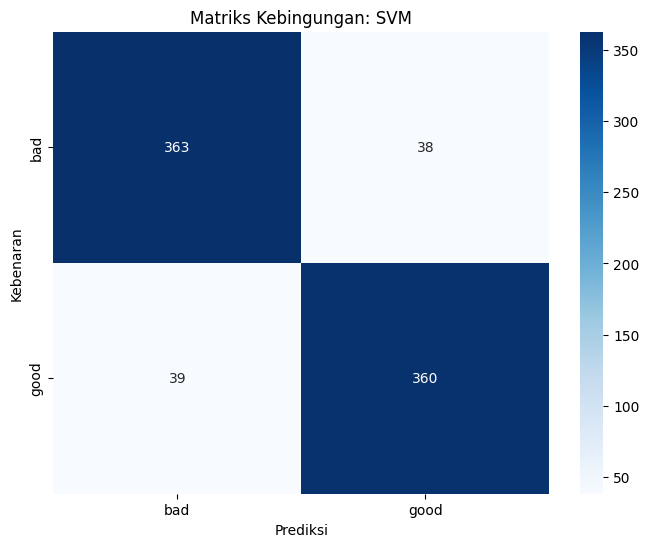

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Melatih model SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluasi model SVM
def evaluate_svm(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print("\n===== Evaluasi Model: SVM =====")
    print(f"Akurasi: {accuracy:.4f}\n")
    print("Laporan Klasifikasi:")
    print(class_report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title('Matriks Kebingungan: SVM')
    plt.xlabel('Prediksi')
    plt.ylabel('Kebenaran')
    plt.show()

    return accuracy  # Mengembalikan akurasi

# Panggil fungsi evaluasi SVM
svm_accuracy = evaluate_svm(y_test, y_pred_svm)


**Visualisasi Algoritma Naive Bayes**


===== Evaluasi Model: Naive Bayes =====
Akurasi: 0.7625

Laporan Klasifikasi:
              precision    recall  f1-score   support

         bad       0.76      0.78      0.77       401
        good       0.77      0.75      0.76       399

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800



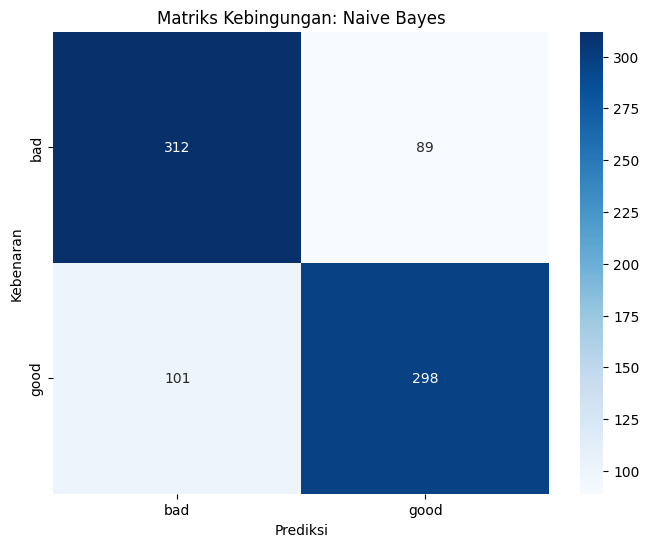

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Melatih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluasi model Naive Bayes
def evaluate_nb(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print("\n===== Evaluasi Model: Naive Bayes =====")
    print(f"Akurasi: {accuracy:.4f}\n")
    print("Laporan Klasifikasi:")
    print(class_report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title('Matriks Kebingungan: Naive Bayes')
    plt.xlabel('Prediksi')
    plt.ylabel('Kebenaran')
    plt.show()

    return accuracy  # Mengembalikan akurasi

# Panggil fungsi evaluasi Naive Bayes
nb_accuracy = evaluate_nb(y_test, y_pred_nb)


**Visualisasi Algoritma Decision Tree**


===== Evaluasi Model: Decision Tree =====
Akurasi: 0.8087

Laporan Klasifikasi:
              precision    recall  f1-score   support

         bad       0.81      0.80      0.81       401
        good       0.80      0.81      0.81       399

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



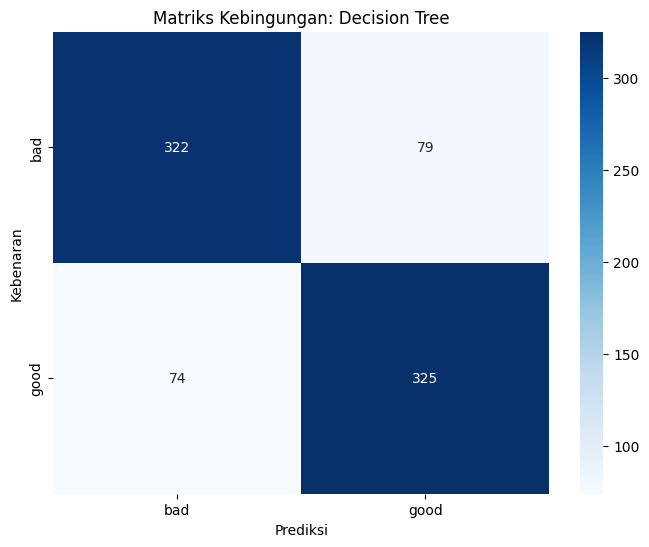

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Melatih model Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluasi model Decision Tree
def evaluate_dt(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print("\n===== Evaluasi Model: Decision Tree =====")
    print(f"Akurasi: {accuracy:.4f}\n")
    print("Laporan Klasifikasi:")
    print(class_report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title('Matriks Kebingungan: Decision Tree')
    plt.xlabel('Prediksi')
    plt.ylabel('Kebenaran')
    plt.show()

    return accuracy  # Mengembalikan akurasi

# Panggil fungsi evaluasi Decision Tree
dt_accuracy = evaluate_dt(y_test, y_pred_dt)


**Dokumentasi Visualisasi Perbandingan**

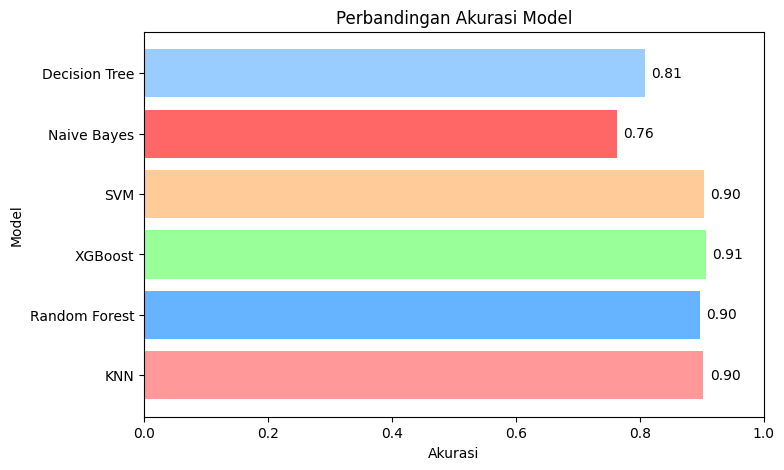

In [ ]:
import matplotlib.pyplot as plt

# Menyimpan akurasi model dalam list
model_names = ['KNN', 'Random Forest', 'XGBoost', 'SVM', 'Naive Bayes', 'Decision Tree']
accuracies = [knn_accuracy, rf_accuracy, xgb_accuracy, svm_accuracy, nb_accuracy, dt_accuracy]

# Membuat plot horizontal bar untuk perbandingan akurasi model
plt.figure(figsize=(8, 5))
plt.barh(model_names, accuracies, color=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FF6666', '#99CCFF'])
plt.xlim(0, 1)
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Akurasi')
plt.ylabel('Model')

# Menambahkan nilai akurasi di sebelah bar
for i, v in enumerate(accuracies):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center')

plt.show()


# **5. Kesimpulan**

Model untuk memprediksi kualitas apel telah berhasil dikembangkan menggunakan beberapa algoritma machine learning, termasuk KNN, Random Forest, SVM, Naive Bayes, Decision Tree, dan XGBoost. Model-model ini telah dilatih dan dievaluasi dengan menggunakan dataset yang relevan, menghasilkan metrik akurasi, presisi, dan recall yang menunjukkan kinerja yang baik dalam klasifikasi. Model ini dapat diterapkan untuk memprediksi kualitas apel dalam data nyata, memberikan nilai tambah bagi para petani dan produsen dalam meningkatkan hasil panen dan kualitas produk mereka.

Ke depan, terdapat beberapa area yang dapat dikembangkan lebih lanjut, seperti eksplorasi algoritma machine learning tambahan yang mungkin menawarkan kinerja yang lebih baik, serta penerapan pendekatan deep learning untuk menangkap pola yang lebih kompleks dalam data. Dengan pengembangan ini, diharapkan model dapat memberikan prediksi yang lebih akurat dan mendukung keputusan yang lebih baik dalam pengelolaan kualitas apel.



# ***Referensi***



*   [link text](https://revou.co/kosakata/eda)
*   [link text](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data)


*   [link text](https://aws.amazon.com/id/what-is/data-preparation/)
*   [link text](https://github.com/fauziahumri/MachineLearningTerapan/blob/main/MLT_Submission_1.ipynb)


*   [link text](https://github.com/unorderedlists/MLterapan-pertama/blob/main/notebook.ipynb)
*   [link text](https://github.com/ridwanabdiansah29/Submission-Dicoding-ML-Terapan1/blob/main/Ridwan_Abdiansah_MLT1.ipynb)




